# New RSA

In [10]:
import rsatoolbox
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import re
from pathlib import Path
from tqdm.auto import tqdm

In [11]:
dataset_v1 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000')
dataset_v2 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2')

## Utility Functions

In [404]:
def get_dataset(image_name):
    if re.match(r'^n[0-9]+', image_name):
        return 'ImageNet'
    elif re.match(r'^COCO', image_name):
        return 'COCO'
    else:
        return 'Scene'
    
def sort_rdms(rdms):
    df = pd.DataFrame(rdms.pattern_descriptors['image'], columns=['image'])
    df['dataset'] = df.image.apply(get_dataset)
    df = df.sort_values(['dataset', 'image'])
    rdms.reorder(df.index)
    
def get_label_spans(labels):
    spans = []
    start = 0
    label = labels[0]
    for i, next_label in enumerate(labels):
        if label != next_label:
            spans.append((label, start, i))
            label = next_label
            start = i
    
    # Add last span
    spans.append((label, start, i))
    return spans
    
def plot_rdm(
    rdm,
    ax=None,
    cmap=rsatoolbox.vis.colors.rdm_colormap(),
    colorbar=True
):
    if ax == None:
        ax = plt.gca()
    
    rdm_mean = rdm.dissimilarities[0].mean()
    rdm_std = rdm.dissimilarities[0].std()
    vmin = rdm_mean - rdm_std
    vmax = rdm_mean + rdm_std
    
    mat = rdm.get_matrices()[0]
    mat[np.eye(rdm.n_cond, dtype=bool)] = np.nan

    im = ax.imshow(mat, cmap=cmap, vmin=vmin, vmax=vmax, interpolation ='antialiased')
    
    ax.set_title(rdm.rdm_descriptors['roi'][0], y=1.1)
    
    datasets = [get_dataset(image) for image in rdm.pattern_descriptors['image']]
    spans = get_label_spans(datasets)
    xticks = {x for s in spans for x in s[1:]}
    labels = [s[0] for s in spans]
    label_locs = [(s[1] + s[2])/2 for s in spans]
    
    ax.set_xticks(list(xticks))
    ax.set_yticks(list(xticks))
    ax.set_xticks(label_locs, labels=labels, minor=True, ha='center')
    ax.set_yticks(label_locs, labels=labels, minor=True, rotation='vertical', va='center')
    ax.set_ylabel('Dataset')
    ax.tick_params(
        which='major',
        top=True, bottom=False, left=True, right=False,
        labeltop=False, labelbottom=False, labelleft=False, labelright=False,
    )
    ax.tick_params(
        which='minor',
        top=False, bottom=False, left=False, right=False, 
        labeltop=True, labelbottom=False, labelleft=True, labelright=False, 
    )
    
    if colorbar:
        cbar_label = rdm.dissimilarity_measure.capitalize() + ' Distance'
        cbar = plt.colorbar(im, label=cbar_label, fraction=0.045, pad=0.04, orientation='horizontal', extend='both')
        cbar.set_ticks([cbar.vmin, (cbar.vmin + cbar.vmax)/2, cbar.vmax])
        cbar.set_ticklabels(['Lesser', 'Mean', 'Greater'])
    
    return im

# def plot_rdms(rdms, ncols=2):
    

def plot_histogram(rdms, ax=None):
    if ax == None:
        ax = plt.gca()
        
    ax.hist(
        rdms.dissimilarities[0], 
        bins = 10000, 
        histtype='step'
    )
    
    ax.set_title(rdm.rdm_descriptors['roi'][0])
    
def get_single_pres(rdms):
    # Load listing of duplicate images from dataset
    repeat_df = pd.read_csv(
        dataset_v2 / 'BOLD5000_Stimuli' / 'Scene_Stimuli' / 'repeated_stimuli_113_list.txt',
        header=None,
        names=['image']
    )
    
    images_df = pd.DataFrame(rdms.pattern_descriptors['image'], columns=['image'])
    images_df = images_df[~images_df.image.isin(repeat_df.image)]
    return rdms.subsample_pattern('image', images_df.image.tolist())

In [290]:
datasets = [get_dataset(image) for image in mean_corr_rdms.pattern_descriptors['image']]
spans = get_label_spans(datasets)

In [292]:
xticks = {x for s in spans for x in s[1:]}
labels = [s[0] for s in spans]
label_locs = [(s[1] + s[2])/2 for s in spans]

In [297]:
label_locs

[1000.0, 2958.0, 4415.5]

In [291]:
spans

[('COCO', 0, 2000), ('ImageNet', 2000, 3916), ('Scene', 3916, 4915)]

In [215]:
get_label_spans([get_dataset(image) for image in mean_rdms.pattern_descriptors['image']])

[('COCO', 0, 2000), ('ImageNet', 2000, 3916), ('Scene', 3916, 4915)]

In [128]:
mean_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'MEAN_vcAtlas_RDMs.h5'))

In [129]:
sort_rdms(mean_rdms)

In [130]:
len(mean_rdms)

16

In [160]:
single_pres_rdm = get_single_pres_rdms(mean_rdms)

In [162]:
csi1_euc_single_rdms = get_single_pres(csi1_euc_rdms)

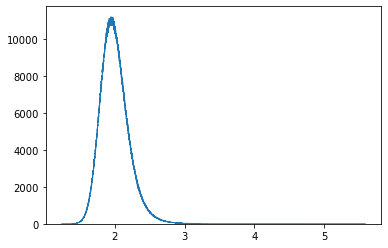

In [163]:
# Creating histogram
fig, ax = plt.subplots()
ax.hist(csi1_euc_single_rdms.subset('roi', 'RHFG3').dissimilarities[0], bins = 10000, histtype='step')
 
# Show plot
plt.show()

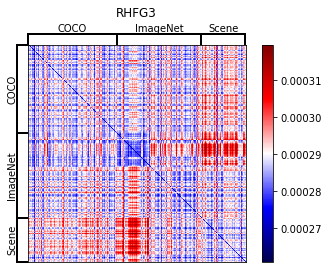

In [263]:
plot_rdm(single_pres_rdm.subset('roi', 'RHFG3'), cmap='seismic')

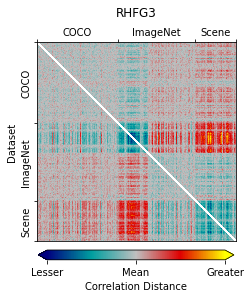

In [400]:
plot_rdm(csi1_rdms.subset('roi', 'RHFG3'))

In [ ]:
plot_rdm(csi1_rdms.subset('roi', 'RHFG3').sor)

In [409]:
rsatoolbox.vis.show_rdm(csi1_rdms.subset('roi', 'RHFG3').sort_by(image='alpha'))

AttributeError: 'NoneType' object has no attribute 'n_cond'

(<Figure size 720x720 with 3 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f0a01f49820>},
              <Figure size 720x720 with 3 Axes>: {'colorbar': <matplotlib.colorbar.Colorbar at 0x7f09dd6a24f0>}}))

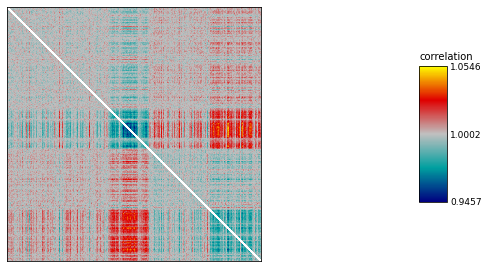

In [364]:
rdm = csi1_rdms.subset('roi', 'RHFG3')
rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()
rsatoolbox.vis.show_rdm(
    rdm, 
    figsize=(10,10), 
    show_colorbar='figure',
    vmin=rdm_mean-rdm_std,
    vmax=rdm_mean+rdm_std
)

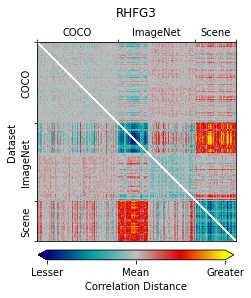

In [405]:
plot_rdm(mean_corr_rdms.subset('roi', 'RHFG3'))

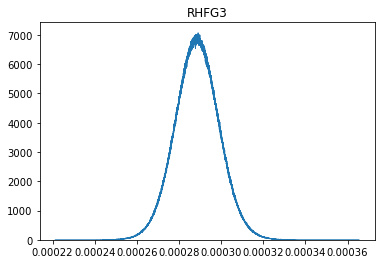

In [346]:
plot_histogram(mean_corr_rdms.subset('roi', 'RHFG3'))

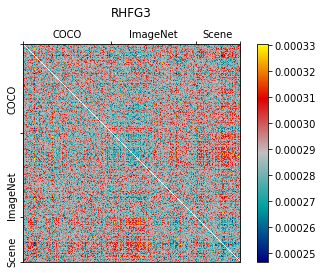

In [343]:
plot_rdm(mean_corr_rdms.subset('roi', 'RHFG3'))

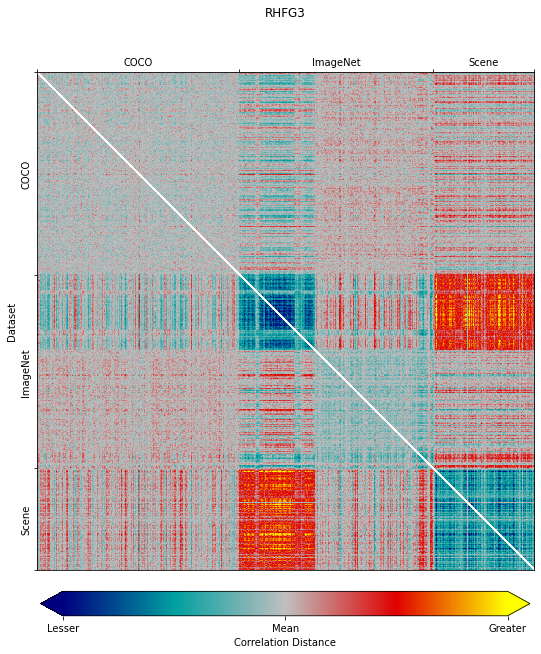

In [410]:
fig, ax = plt.subplots(figsize=(10,10))
plot_rdm(mean_corr_rdms.subset('roi', 'RHFG3'), ax=ax)

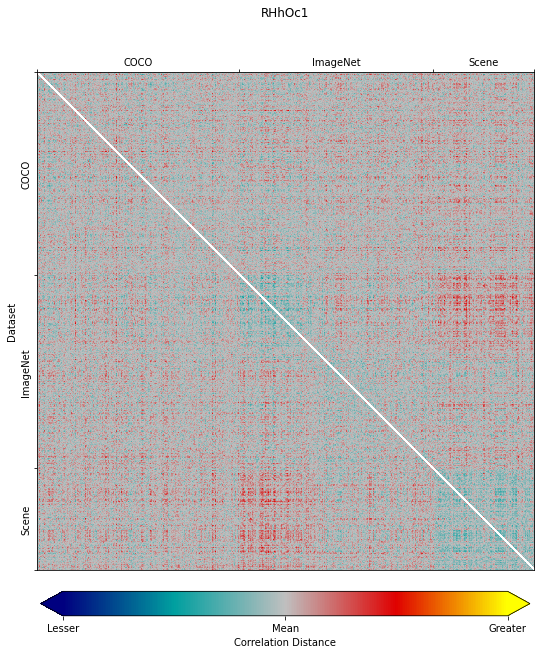

In [412]:
fig, ax = plt.subplots(figsize=(10,10))
plot_rdm(mean_corr_rdms.subset('roi', 'RHhOc1'), ax=ax)

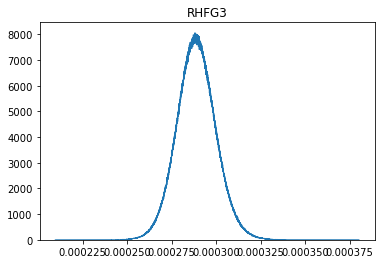

In [413]:
plot_histogram(mean_corr_rdms.subset('roi', 'RHhOc1'))

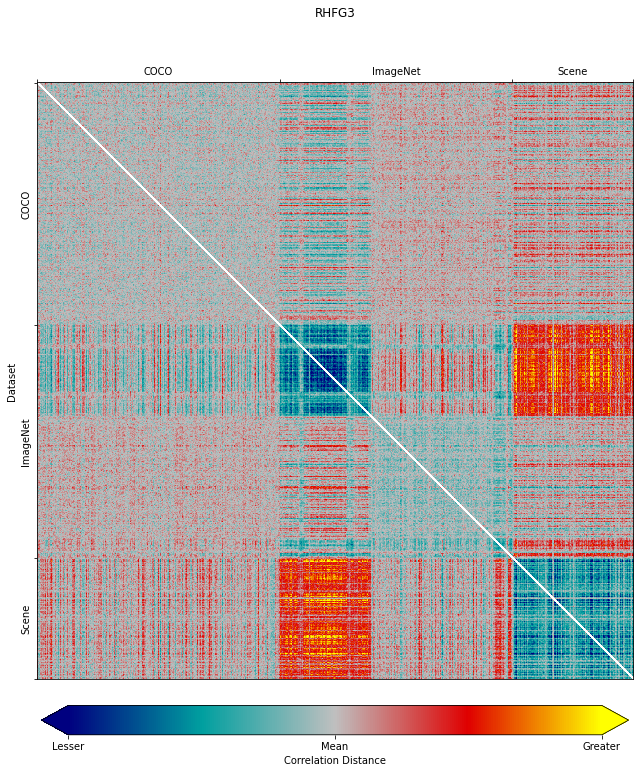

In [407]:
fig, ax = plt.subplots(figsize=(12,12))
plot_rdm(get_single_pres(mean_corr_rdms.subset('roi', 'RHFG3')), ax=ax)

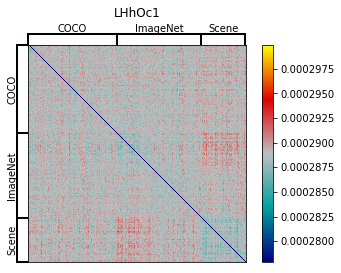

In [280]:
plot_rdm(mean_corr_rdms.subset('roi', 'LHhOc1'))

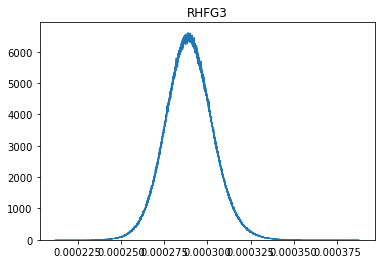

In [279]:
plot_histogram(mean_corr_rdms.subset('roi', 'LHhOc3v'))

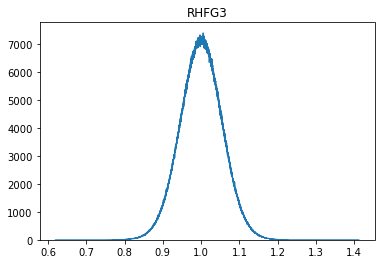

In [204]:
plot_histogram(csi1_rdms.subset('roi', 'RHFG3'))

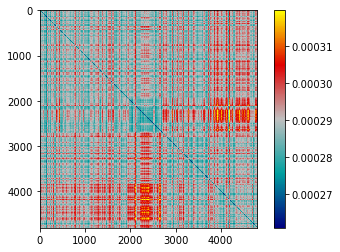

In [161]:
rdm = single_pres_rdm.subset('roi', 'RHFG3')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = rdm_mean - rdm_std,
    vmax = rdm_mean + rdm_std
)

plt.colorbar()

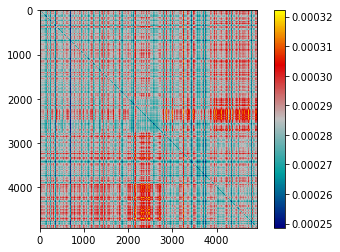

In [131]:
rdm = mean_rdms.subset('roi', 'RHFG3')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = rdm_mean - rdm_std,
    vmax = rdm_mean + rdm_std
)

plt.colorbar()

In [132]:
csi1_euc_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'CSI1_vcAtlas_RDMs.h5'))

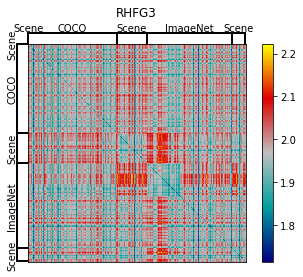

In [267]:
plot_rdm(csi1_euc_rdms.subset('roi', 'RHFG3'))

In [142]:
csi1_sqr_euc_rdms = rsatoolbox.rdm.sqrt_transform(csi1_euc_rdms.subset('roi', 'RHFG3'))

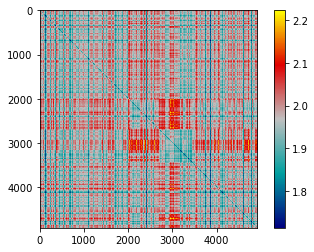

In [144]:
rdm = csi1_euc_rdms.subset('roi', 'RHFG3')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = rdm_mean - rdm_std,
    vmax = rdm_mean + rdm_std
)

plt.colorbar()

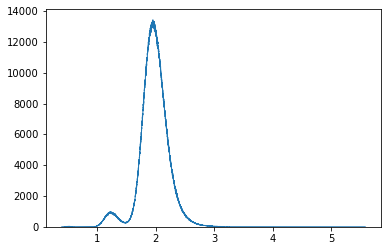

In [145]:
# Creating histogram
fig, ax = plt.subplots()
ax.hist(csi1_euc_rdms.subset('roi', 'RHFG3').dissimilarities[0], bins = 10000, histtype='step')
 
# Show plot
plt.show()

In [34]:
csi1_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'CSI1_vcAtlas_CORR_RDMs.h5'))

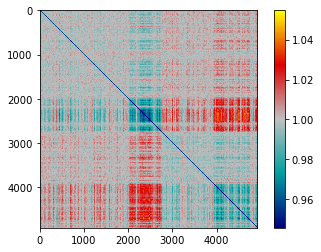

In [35]:
rdm = csi1_rdms.subset('roi', 'RHFG3')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = rdm_mean - rdm_std,
    vmax = rdm_mean + rdm_std
)

plt.colorbar()

In [36]:
csi3_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'CSI3_vcAtlas_CORR_RDMs.h5'))

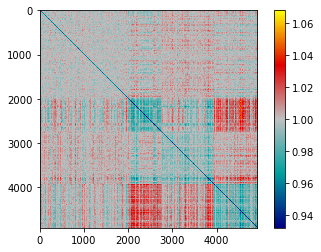

In [37]:
rdm = csi3_rdms.subset('roi', 'RHFG3')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = rdm_mean - rdm_std,
    vmax = rdm_mean + rdm_std
)

plt.colorbar()

In [38]:
csi2_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'CSI2_vcAtlas_CORR_RDMs.h5'))

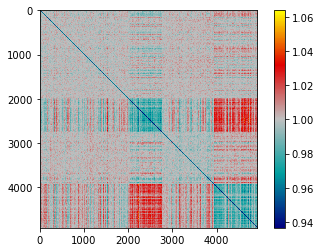

In [40]:
rdm = csi2_rdms.subset('roi', 'RHFG3')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = rdm_mean - rdm_std,
    vmax = rdm_mean + rdm_std
)

plt.colorbar()

In [41]:
csi4_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'CSI4_vcAtlas_CORR_RDMs.h5'))

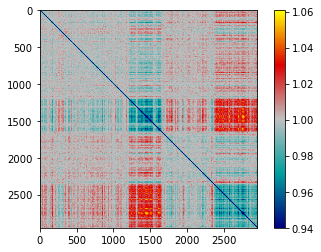

In [43]:
rdm = csi4_rdms.subset('roi', 'RHFG3')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = rdm_mean - rdm_std,
    vmax = rdm_mean + rdm_std
)

plt.colorbar()

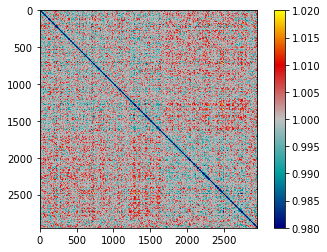

In [65]:
rdm = csi4_rdms.subset('roi', 'LHhOc3v')

rdm_mean = rdm.dissimilarities[0].mean()
rdm_std = rdm.dissimilarities[0].std()

plt.imshow(
    rdm.get_matrices()[0],
    # cmap = 'RdBu_r',
    cmap = rsatoolbox.vis.colors.rdm_colormap(),
    vmin = 0.98,
    vmax = 1.02
)

plt.colorbar()

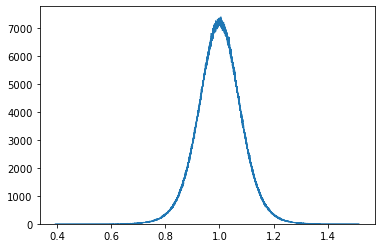

In [56]:
# Creating histogram
fig, ax = plt.subplots()
ax.hist(csi1_rdms.subset('roi', 'LHhOc3v').dissimilarities[0], bins = 10000, histtype='step')
 
# Show plot
plt.show()

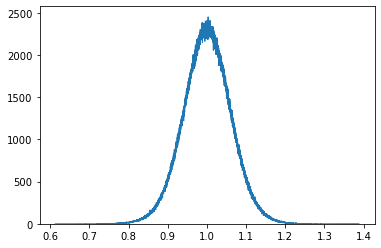

In [57]:
# Creating histogram
fig, ax = plt.subplots()
ax.hist(csi4_rdms.subset('roi', 'RHFG3').dissimilarities[0], bins = 10000, histtype='step')
 
# Show plot
plt.show()

In [69]:
np.array(csi3_rdms.pattern_descriptors['image'])[-1000:]

array(['ATM1.jpg', 'ATM2.jpg', 'ATM4.jpg', 'ATM5.jpg',
       'HorseRaceTrack.jpg', 'HorseRaceTrack2.jpg', 'HorseRaceTrack3.jpg',
       'HorseRaceTrack4.jpg', 'ISS1.jpg', 'ISS2.jpg', 'ISS3.jpg',
       'ISS4.jpg', 'MRI1.jpg', 'MRI2.jpg', 'MRI3.jpg', 'MRI4.jpg',
       'RVinside1.jpg', 'RVinside2.jpg', 'RVinside4.jpg', 'RVinside5.jpg',
       'ShowJumping5.jpg', 'ShowJumping7.jpg', 'ShowJumping8.jpg',
       'ShowJumping9.jpg', 'airplanecabin1.jpg', 'airplanecabin3.jpg',
       'airplanecabin5.jpg', 'airplanecabin6.jpg', 'airportTerminal2.jpg',
       'airportTerminal3.jpg', 'airportTerminal4.jpg',
       'airportTerminal6.jpg', 'alley1.jpg', 'alley2.jpg', 'alley3.jpg',
       'alley4.jpg', 'amusement1.jpg', 'amusement2.jpg', 'amusement3.jpg',
       'amusement4.jpg', 'apartmentBuilding1.jpg',
       'apartmentBuilding2.jpg', 'apartmentBuilding3.jpg',
       'apartmentBuilding4.jpg', 'appleorchard1.jpg', 'appleorchard2.jpg',
       'appleorchard3.jpg', 'appleorchard4.jpg', 'applestore1

## Calculate RDMs for Each Subject and ROI Atlas

In [31]:
for sub in tqdm(range(1, 5), desc='Participant'):    
    # Load dataframe containing image descriptions and presentation order
    sub_df = pd.read_pickle(dataset_v2 / f'CSI{sub}_dataframe.pkl')

    # Create observation descriptors
    obs_descriptors = {
        'image': sub_df.image,
        'dataset': sub_df.dataset
    }

    for atlas in tqdm(['vcAtlas', 'visfAtlas', 'BOLD5000'], desc='Atlas'):
        # Load subject ROI data for givent atlas
        sub_data = h5py.File(dataset_v2 / f'CSI{sub}_{atlas}_ROIs.h5')
        
        roi_datasets = []
        for roi in tqdm(sub_data.keys(), desc='ROI'):
            des = {'roi': roi}
            dataset = rsatoolbox.data.Dataset(
                # Re-index array with alphabetical index
                sub_data[roi][...],
                descriptors = des,
                obs_descriptors = obs_descriptors
            )
            roi_datasets.append(dataset)
        
        # Calculate RDMs
        roi_rdms = rsatoolbox.rdm.calc_rdm(roi_datasets, method='correlation', descriptor='image')
        sort_rdms(roi_rdms)
        roi_rdms.save(dataset_v2 / f'CSI{sub}_{atlas}_CORR_RDMs.h5')

Participant:   0%|          | 0/4 [00:00<?, ?it/s]

Atlas:   0%|          | 0/3 [00:00<?, ?it/s]

ROI:   0%|          | 0/16 [00:00<?, ?it/s]

ROI:   0%|          | 0/33 [00:00<?, ?it/s]

ROI:   0%|          | 0/10 [00:00<?, ?it/s]

Atlas:   0%|          | 0/3 [00:00<?, ?it/s]

ROI:   0%|          | 0/16 [00:00<?, ?it/s]

ROI:   0%|          | 0/33 [00:00<?, ?it/s]

ROI:   0%|          | 0/10 [00:00<?, ?it/s]

Atlas:   0%|          | 0/3 [00:00<?, ?it/s]

ROI:   0%|          | 0/16 [00:00<?, ?it/s]

ROI:   0%|          | 0/33 [00:00<?, ?it/s]

ROI:   0%|          | 0/10 [00:00<?, ?it/s]

Atlas:   0%|          | 0/3 [00:00<?, ?it/s]

ROI:   0%|          | 0/16 [00:00<?, ?it/s]

ROI:   0%|          | 0/33 [00:00<?, ?it/s]

/s/babbage/b/nobackup/nblancha/merry/conda/envs/fmri-gen/lib/python3.8/site-packages/rsatoolbox/data/computations.py:36: RuntimeWarning: invalid value encountered in multiply
  average = np.nan * np.empty(


ROI:   0%|          | 0/10 [00:00<?, ?it/s]

## Combine partial RDMs

In [273]:
for atlas in tqdm(['vcAtlas', 'visfAtlas', 'BOLD5000'], desc='Atlas'):
    # Load participant RDMs
    sub_rdms = []
    for sub in tqdm(range(1, 5), desc='Participant'):
        sub_rdm = rsatoolbox.rdm.load_rdm(str(dataset_v2 / f'CSI{sub}_{atlas}_CORR_RDMs.h5'))
        sub_rdms.append(sub_rdm)
    
    atlas_rdms = []
    # For each ROI, combine partial RDMs
    for roi in tqdm(sub_rdms[0].rdm_descriptors['roi'], desc='ROI'):
        partials = [rdms.subset('roi', roi) for rdms in sub_rdms]
        # Add NaNs so all RDMs have same number of conditions
        partials = rsatoolbox.rdm.combine.from_partials(partials, descriptor='image')
        # TODO: Necessary to rescale?
        partials = rsatoolbox.rdm.combine.rescale(partials, method='evidence')
        mean_rdm = partials.mean(weights='rescalingWeights')
        mean_rdm.rdm_descriptors['roi'] = [roi]
        atlas_rdms.append(mean_rdm)
    
    atlas_rdms = rsatoolbox.rdm.concat(atlas_rdms)
    # Fix bug that creats a descriptors set instead of dict
    atlas_rdms.descriptors = {}
    atlas_rdms.save(dataset_v2 / f'MEAN_{atlas}_CORR_RDMs.h5')

Atlas:   0%|          | 0/3 [00:00<?, ?it/s]

Participant:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Participant:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Participant:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [275]:
mean_corr_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / f'MEAN_vcAtlas_CORR_RDMs.h5'))

In [ ]:
rsa_too

In [ ]:
atlas_rdms

In [186]:
roi_rdms = []

for roi in tqdm(sub_rdms[0].rdm_descriptors['roi']):
    partials = [rdms.subset('roi', roi) for rdms in sub_rdms]
    # Add NaNs so all RDMs have same number of conditions
    partials = rsatoolbox.rdm.combine.from_partials(partials, descriptor='image')
    # TODO: Necessary to rescale?
    partials = rsatoolbox.rdm.combine.rescale(partials, method='evidence')
    mean_rdm = partials.mean(weights='rescalingWeights')
    mean_rdm.rdm_descriptors['roi'] = [roi]
    roi_rdms.append(mean_rdm)

  0%|          | 0/10 [00:00<?, ?it/s]

In [188]:
atlas_rdms = rsatoolbox.rdm.concat(roi_rdms)

<AxesSubplot:>

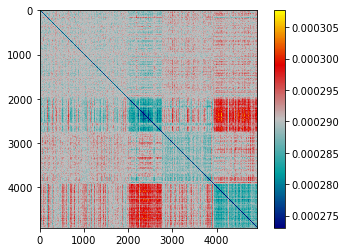

In [190]:
plot_rdm(atlas_rdms.subset('roi', 'RHPPA'))

In [108]:
atlas = 'BOLD5000'
sub_rdms = [
    rsatoolbox.rdm.load_rdm(str(dataset_v2 / f'CSI{sub}_{atlas}_CORR_RDMs.h5'))
    for sub in tqdm(range(1, 5), desc='Participant')
]

Participant:   0%|          | 0/4 [00:00<?, ?it/s]

In [116]:
roi = sub_rdms[0].rdm_descriptors['roi'][0]
roi

'LHEarlyVis'

In [122]:
partials = [rdms.subset('roi', roi) for rdms in sub_rdms]

In [123]:
partials = rsatoolbox.rdm.combine.from_partials(partials, descriptor='image')

In [ ]:
partials

In [124]:
partials = rsatoolbox.rdm.combine.rescale(partials, method='evidence')

In [126]:
mean_rdm = partials.mean(weights='rescalingWeights')

In [ ]:
mean_rdm

In [ ]:
partials = rsatoolbox.rdm.combine.from_partials(sub_rdms, descriptor)
## then we rescale/align these based on pairs in common (put them in the same space)
rescaledPartials = rescale(partials, method='evidence')
## then we can take a weighted average:
meanRDM = rescaledPartials.mean(weights='rescalingWeights')

In [76]:
partials = [rdms.subset('roi', roi) for rdms in sub_rdms]

In [81]:
partials = rsatoolbox.rdm.combine.from_partials(partials, descriptor='image')

In [ ]:
rsatoolbox.rdm.combine.rescale(partials, method='simple')

In [19]:
f = h5py.File(dataset_v2 / f'CSI4_BOLD5000_ROIs.h5')

In [9]:
f['LHEarlyVis']

<HDF5 dataset "LHEarlyVis": shape (5254, 210), type "<f8">

In [13]:
d = f['LHEarlyVis'][...]

In [15]:
d.nbytes

8826720

In [21]:
f.parent

<HDF5 group "/" (10 members)>

## Detect Duplicate Images

In [3]:
csi1_df = pd.read_pickle(dataset_v2 / 'CSI1_dataframe.pkl')
csi1_data = h5py.File(dataset_v2 / 'CSI1_vcAtlas_ROIs.h5')

In [4]:
# Manually Count number of image occurances
count = csi1_df.groupby('image').size().reset_index(name='count')
repeats = count[count['count'] > 1]
repeats

image  count
119   COCO_train2014_000000027710.jpg      4
123   COCO_train2014_000000028868.jpg      4
162   COCO_train2014_000000037823.jpg      4
241   COCO_train2014_000000061215.jpg      4
352   COCO_train2014_000000088449.jpg      4
...                               ...    ...
4770                   shoestore5.jpg      4
4773               shootingrange5.jpg      3
4780                    sidewalk1.jpg      4
4804                  squashcourt.jpg      4
4831                      tailor6.jpg      4

[113 rows x 2 columns]

In [5]:
# Load listing of duplicate images from dataset
repeat_df = pd.read_csv(
    dataset_v2 / 'BOLD5000_Stimuli' / 'Scene_Stimuli' / 'repeated_stimuli_113_list.txt',
    header=None,
    names=['image']
)

In [6]:
repeat_df.sort_values('image')

image
13   COCO_train2014_000000027710.jpg
29   COCO_train2014_000000028868.jpg
42   COCO_train2014_000000037823.jpg
40   COCO_train2014_000000061215.jpg
26   COCO_train2014_000000088449.jpg
..                               ...
91                    shoestore5.jpg
112               shootingrange5.jpg
94                     sidewalk1.jpg
111                  squashcourt.jpg
110                      tailor6.jpg

[113 rows x 1 columns]

### Images with single presentation

In [7]:
csi1_df[~csi1_df.image.isin(repeat_df.image)]

image   dataset
0                n01930112_19568.JPEG  ImageNet
1                n03733281_29214.JPEG  ImageNet
2                 n07695742_5848.JPEG  ImageNet
3     COCO_train2014_000000420713.jpg      COCO
5                 n01917289_1429.JPEG  ImageNet
...                               ...       ...
5248             n03240683_13368.JPEG  ImageNet
5249             n03459775_11670.JPEG  ImageNet
5251                    dinosaur4.jpg     Scene
5252  COCO_train2014_000000244132.jpg      COCO
5253  COCO_train2014_000000292845.jpg      COCO

[4803 rows x 2 columns]

In [20]:
# Load dataframe containing image descriptions and presentation order
sub_df = pd.read_pickle(dataset_v2 / 'CSI1_dataframe.pkl')[['image', 'dataset']]
sub_df = sub_df.sort_values(['dataset', 'image'])

# Create observation descriptors
obs_descriptors = {
    'image': sub_df.image,
    'dataset': sub_df.dataset
}

In [21]:
sub_df

image dataset
2384  COCO_train2014_000000000036.jpg    COCO
1286  COCO_train2014_000000000584.jpg    COCO
1119  COCO_train2014_000000000605.jpg    COCO
4452  COCO_train2014_000000000625.jpg    COCO
3858  COCO_train2014_000000000650.jpg    COCO
...                               ...     ...
485                wrestlingring8.jpg   Scene
1491                  yogastudio1.jpg   Scene
83                    yogastudio2.jpg   Scene
4166                  yogastudio3.jpg   Scene
1251                  yogastudio4.jpg   Scene

[5254 rows x 2 columns]

In [17]:
alpha_index = sub_df.sort_values(['dataset', 'image']).index
alpha_index

Int64Index([2384, 1286, 1119, 4452, 3858, 4818, 2095, 3027, 2131,   67,
            ...
            2146,  489,  279,  338, 4735,  485, 1491,   83, 4166, 1251],
           dtype='int64', length=5254)

In [24]:
sub_data = h5py.File(dataset_v2 / 'CSI1_vcAtlas_ROIs.h5')

In [28]:
roi_data = sub_data['LHFG1'][...]

In [29]:
roi_data

array([[ 0.72425138,  1.05559531,  0.80941652, ...,  0.69131319,
        -1.43313385,  0.01800644],
       [ 0.0644474 , -1.8325511 , -1.17163328, ...,  0.80138684,
        -0.14156489, -0.84240991],
       [ 1.1015135 ,  0.17618783, -0.6367334 , ..., -0.0641092 ,
         1.41226085,  0.51974677],
       ...,
       [ 0.24207635, -0.00266527,  1.49597488, ..., -1.57230994,
         0.50004302, -0.57013014],
       [ 0.24118602, -0.8621167 , -0.5909063 , ...,  0.69037219,
        -0.67870635, -0.47597233],
       [-0.35297027, -1.60584832,  1.14104192, ...,  1.07803646,
         0.47360886,  0.31112916]])

In [31]:
roi_data[alpha_index]

numpy.ndarray

In [32]:
roi_datasets = []
for roi in sub_data.keys():
    des = {'roi': roi}
    # Extract roi vector from h5 file as ndarray
    roi_data = sub_data[roi][...]
    dataset = rsatoolbox.data.Dataset(
        # Re-index array with alphabetical index
        roi_data[alpha_index],
        descriptors = des,
        obs_descriptors = obs_descriptors
    )
    roi_datasets.append(dataset)

In [33]:
roi_rdms = rsatoolbox.rdm.calc_rdm(roi_datasets, descriptor='image')

(<Figure size 720x720 with 21 Axes>,
 array([[<AxesSubplot:title={'center':'LHFG1'}>,
         <AxesSubplot:title={'center':'LHFG2'}>,
         <AxesSubplot:title={'center':'LHFG3'}>,
         <AxesSubplot:title={'center':'LHFG4'}>,
         <AxesSubplot:title={'center':'LHhOc1'}>],
        [<AxesSubplot:title={'center':'LHhOc2'}>,
         <AxesSubplot:title={'center':'LHhOc3v'}>,
         <AxesSubplot:title={'center':'LHhOc4v'}>,
         <AxesSubplot:title={'center':'RHFG1'}>,
         <AxesSubplot:title={'center':'RHFG2'}>],
        [<AxesSubplot:title={'center':'RHFG3'}>,
         <AxesSubplot:title={'center':'RHFG4'}>,
         <AxesSubplot:title={'center':'RHhOc1'}>,
         <AxesSubplot:title={'center':'RHhOc2'}>,
         <AxesSubplot:title={'center':'RHhOc3v'}>],
        [<AxesSubplot:title={'center':'RHhOc4v'}>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHFG1'}>: {

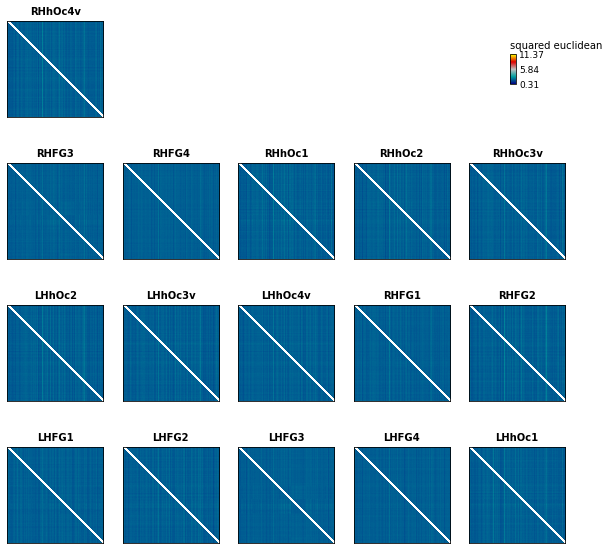

In [34]:
rsatoolbox.vis.show_rdm(
    roi_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    show_colorbar='figure'
)

In [35]:
dataset_rdms = rsatoolbox.rdm.calc_rdm(roi_datasets, descriptor='dataset')

(<Figure size 720x720 with 21 Axes>,
 array([[<AxesSubplot:title={'center':'LHFG1'}>,
         <AxesSubplot:title={'center':'LHFG2'}>,
         <AxesSubplot:title={'center':'LHFG3'}>,
         <AxesSubplot:title={'center':'LHFG4'}>,
         <AxesSubplot:title={'center':'LHhOc1'}>],
        [<AxesSubplot:title={'center':'LHhOc2'}>,
         <AxesSubplot:title={'center':'LHhOc3v'}>,
         <AxesSubplot:title={'center':'LHhOc4v'}>,
         <AxesSubplot:title={'center':'RHFG1'}>,
         <AxesSubplot:title={'center':'RHFG2'}>],
        [<AxesSubplot:title={'center':'RHFG3'}>,
         <AxesSubplot:title={'center':'RHFG4'}>,
         <AxesSubplot:title={'center':'RHhOc1'}>,
         <AxesSubplot:title={'center':'RHhOc2'}>,
         <AxesSubplot:title={'center':'RHhOc3v'}>],
        [<AxesSubplot:title={'center':'RHhOc4v'}>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHFG1'}>: {

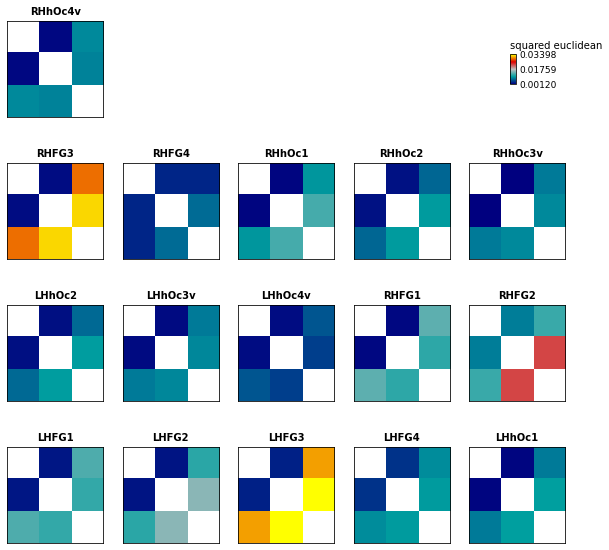

In [36]:
rsatoolbox.vis.show_rdm(
    dataset_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    show_colorbar='figure'
)

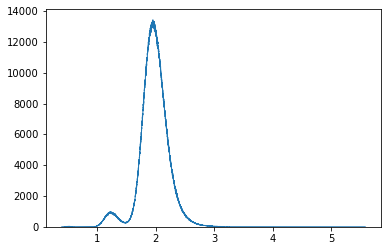

In [44]:
# Creating histogram
fig, ax = plt.subplots()
ax.hist(roi_rdms.subset('roi', ['RHFG3']).dissimilarities[0], bins = 10000, histtype='step')
 
# Show plot
plt.show()

(<Figure size 720x720 with 3 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f3f97537820>},
              <Figure size 720x720 with 3 Axes>: {'colorbar': <matplotlib.colorbar.Colorbar at 0x7f3f78b58a90>}}))

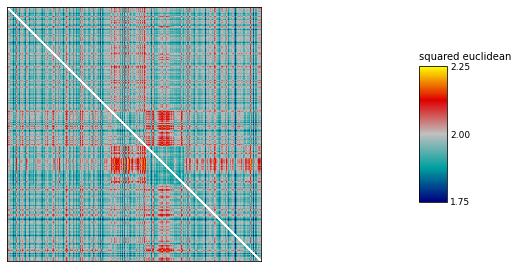

In [45]:
rsatoolbox.vis.show_rdm(
    roi_rdms.subset('roi', ['RHFG3']), 
    figsize=(10,10), 
    show_colorbar='figure',
    vmin=1.75,
    vmax=2.25
)

(<Figure size 720x720 with 3 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7f3f7df3f6d0>},
              <Figure size 720x720 with 3 Axes>: {'colorbar': <matplotlib.colorbar.Colorbar at 0x7f3f75ee3d00>}}))

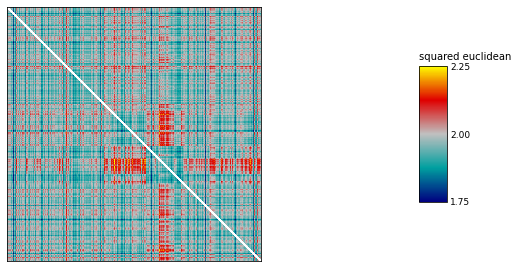

In [46]:
rsatoolbox.vis.show_rdm(
    roi_rdms.subset('roi', ['LHFG3']), 
    figsize=(10,10), 
    show_colorbar='figure',
    vmin=1.75,
    vmax=2.25
)

In [ ]:
roi_rdms.